### Data Exploration

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [3]:
df = pd.read_csv('disney_data_final/disney_data_final.csv')

In [4]:
df.head()

,Unnamed: 0,Title,Directed by,Produced by,Starring,Music by,Distributed by,Running time,Country,Language,Budget,Box office,Running time(int),Budget (float),Box Office (float),Release date,Release date (datetime),imdb,Metascore,Rotten_Tomato
0,0,Snow White and the Seven Dwarfs,"['David Hand', 'Perce Pearce', 'William Cottre...",Walt Disney,"['Adriana Caselotti', 'Roy Atwell', 'Pinto Col...","['Frank Churchill', 'Leigh Harline', 'Paul Smi...",RKO Radio Pictures,83 minutes,United States,English,$1.5 million,$418 million,83.0,1500000.0,418000000.0,"['December 21, 1937 ( Carthay Circle Theatre )...","December 21, 1937",7.6,96.0,NaN
1,1,Pinocchio,"['Ben Sharpsteen', 'Hamilton Luske', 'Bill Rob...",Walt Disney,"['Cliff Edwards', 'Dickie Jones', 'Christian R...","['Leigh Harline', 'Paul J. Smith']",RKO Radio Pictures,88 minutes,United States,English,$2.6 million,$164 million,88.0,2600000.0,164000000.0,"['February 7, 1940 ( Center Theatre )', 'Febru...","February 07, 1940",7.5,99.0,100%
2,2,Fantasia,"['Samuel Armstrong', 'James Algar', 'Bill Robe...","['Walt Disney', 'Ben Sharpsteen']","['Leopold Stokowski', 'Deems Taylor']",See program,RKO Radio Pictures,126 minutes,United States,English,$2.28 million,$76.4–$83.3 million (United States and Canada),126.0,2280000.0,83300000.0,"['November 13, 1940']","November 13, 1940",7.7,96.0,95%
3,3,The Reluctant Dragon,"['Alfred Werker', '(live action)', 'Hamilton L...",Walt Disney,"['Robert Benchley', 'Frances Gifford', 'Buddy ...","['Frank Churchill', 'Larry Morey']",RKO Radio Pictures,74 minutes,United States,English,"$600,000","$960,000 (worldwide rentals)",74.0,600000.0,960000.0,"['June 27, 1941']","June 27, 1941",6.8,NaN,100%
4,4,Dumbo,"['Ben Sharpsteen', 'Norman Ferguson', 'Wilfred...",Walt Disney,"['Edward Brophy', 'Verna Felton', 'Cliff Edwar...","['Frank Churchill', 'Oliver Wallace']",RKO Radio Pictures,64 minutes,United States,English,"$950,000",>$1.3 million (est. United States/Canada renta...,64.0,950000.0,1300000.0,"['October 23, 1941 (New York City)', 'October ...","October 23, 1941",7.2,96.0,98%


In [5]:
df.columns

Index(['Unnamed: 0', 'Title', 'Directed by', 'Produced by', 'Starring',
       'Music by', 'Distributed by', 'Running time', 'Country', 'Language',
       'Budget', 'Box office', 'Running time(int)', 'Budget (float)',
       'Box Office (float)', 'Release date', 'Release date (datetime)', 'imdb',
       'Metascore', 'Rotten_Tomato'],
      dtype='object')

In [6]:
df['Rotten_Tomato'] = df['Rotten_Tomato'].str.rstrip('%').astype(float)

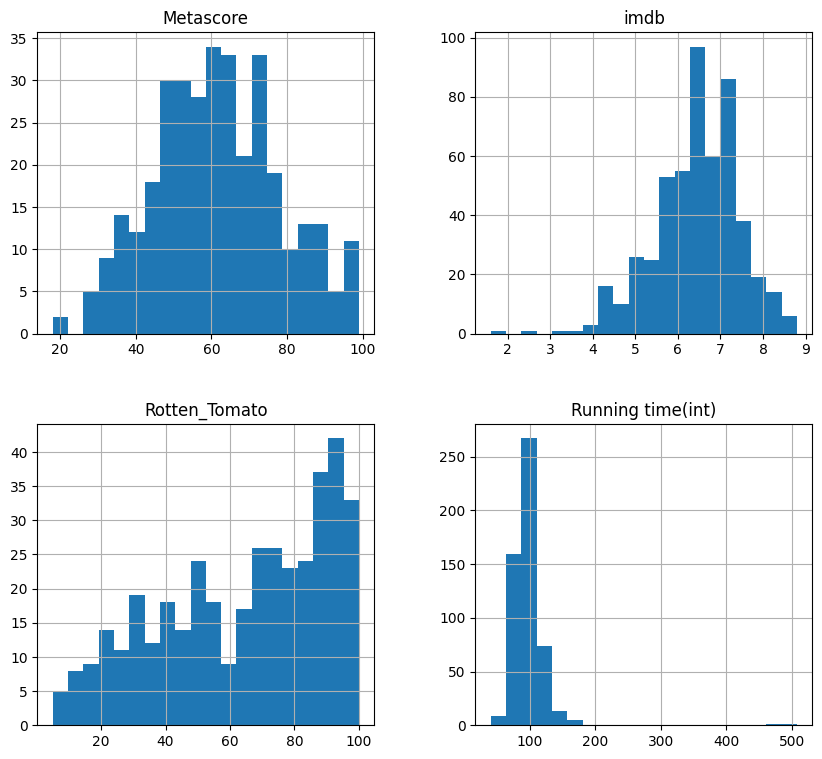

In [7]:
df[['Metascore', 'imdb','Rotten_Tomato','Running time(int)',]].hist(figsize=(10,9),bins=20);

<Axes: xlabel='Budget (float)', ylabel='Box Office (float)'>

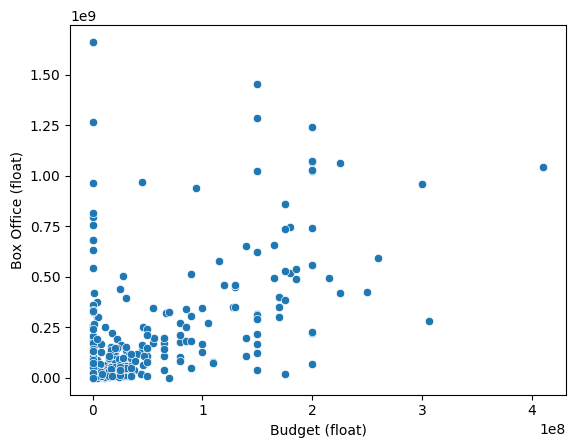

In [8]:
sns.scatterplot(x = 'Budget (float)',y= 'Box Office (float)',data=df)

In [9]:
df[['Running time(int)','Metascore', 'imdb','Rotten_Tomato']].mean()

Running time(int)    97.098299
Metascore            61.602941
imdb                  6.442969
Rotten_Tomato        64.318766
dtype: float64

In [10]:
for col in ['Box Office (float)','Budget (float)','Metascore','imdb','Rotten_Tomato']:
    print("The movie with maximum {} is".format(col))
    print(df.iloc[df[col].idxmax()])
    print('*'*100,end='\n\n')

The movie with maximum Box Office (float) is
Unnamed: 0                                                               464
Title                                                          The Lion King
Directed by                                                      Jon Favreau
Produced by                ['Jon Favreau', 'Jeffrey Silver', 'Karen Gilch...
Starring                   ['Donald Glover', 'Seth Rogen', 'Chiwetel Ejio...
Music by                                                         Hans Zimmer
Distributed by                    ['Walt Disney Studios', 'Motion Pictures']
Running time                                                     118 minutes
Country                                                        United States
Language                                                             English
Budget                                                      $250–260 million
Box office                                                    $1.663 billion
Running time(int)              

### Statisical Analysis

In [11]:
import statsmodels.stats.api as sm
import statsmodels.api as sa
import pylab
import math

#### Running Time 

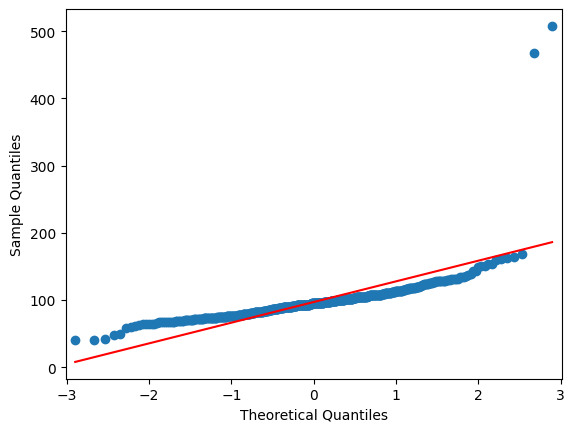

With 95% Confidence we can say that mean Running Time(in minutes) of movies lies between 94.47 and 99.73


In [12]:
run_time = df['Running time(int)'].dropna().values.astype(list)
sa.qqplot(data=run_time,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=run_time).tconfint_mean()
print("With 95% Confidence we can say that mean Running Time(in minutes) of movies lies between {} and {}".format(round(lb,2),round(ub,2)))

#### Metascore

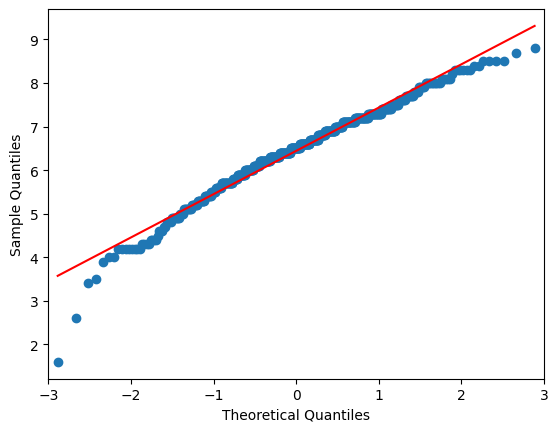

With 95% Confidence we can say that mean Metascore of movies lies between 6.36 and 6.53


In [13]:
metascore = df['imdb'].dropna().values.astype(list)
sa.qqplot(data=metascore,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=metascore).tconfint_mean() # Perform two-sided t-test to calculate 95% CI
print("With 95% Confidence we can say that mean Metascore of movies lies between {} and {}".format(round(lb,2),round(ub,2)))

#### IMDB Rating

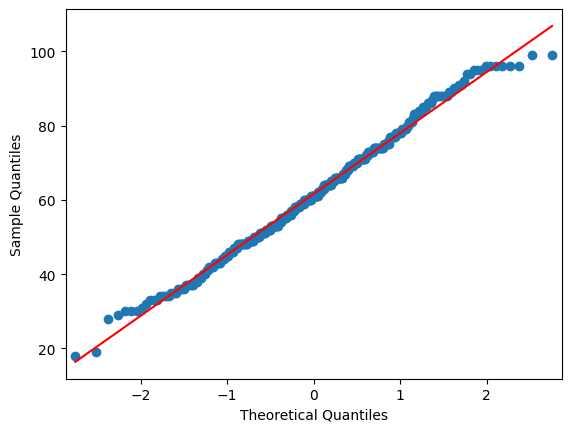

With 95% Confidence we can say that mean IMDB rating of movies lies between 59.85 and 63.36


In [14]:
IMDB = df['Metascore'].dropna().values.astype(list)
sa.qqplot(data=IMDB,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=IMDB).tconfint_mean()
print("With 95% Confidence we can say that mean IMDB rating of movies lies between {} and {}".format(round(lb,2),round(ub,2)))

#### Rotten Tomatoes

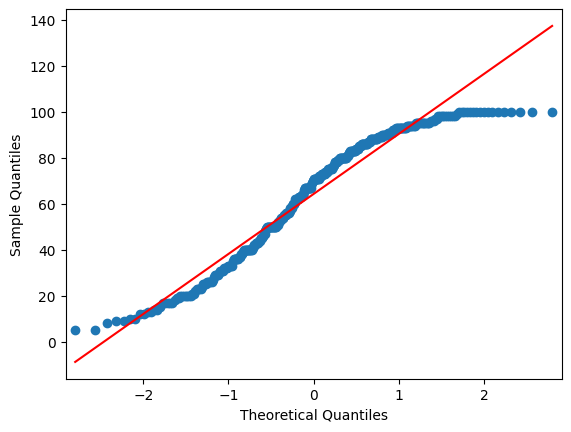

With 95% Confidence we can say that mean Rotten Tomatoes rating of movies lies between 61.71 and 66.92


In [15]:
rotten_tomatoes = df['Rotten_Tomato'].dropna().values.astype(list)
sa.qqplot(data=rotten_tomatoes,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=rotten_tomatoes).tconfint_mean()
print("With 95% Confidence we can say that mean Rotten Tomatoes rating of movies lies between {} and {}".format(round(lb,2),round(ub,2)))

#### Box Office

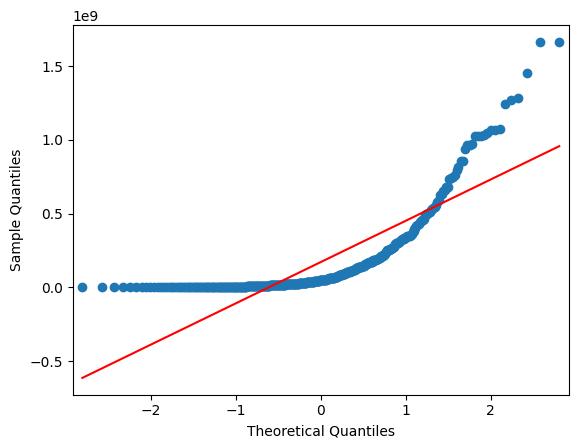

In [16]:
box_office = df['Box Office (float)'].dropna().values.astype(list)
sa.qqplot(data=box_office,line='s')
pylab.show()

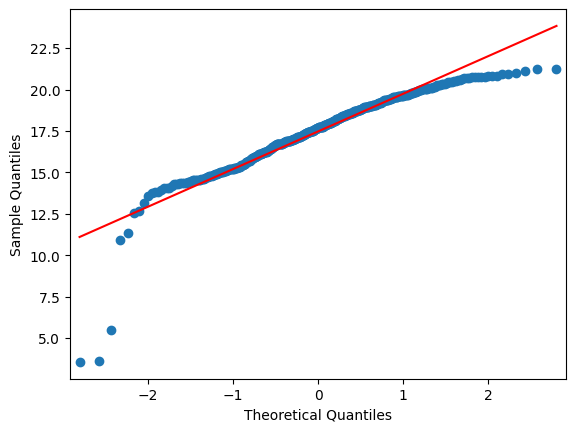

With 95% Confidence we can say that mean Box Office of movies lies between $30821489.75 and $48207137.98


In [17]:
# after log transformation
box_office_log = np.log(df['Box Office (float)'].dropna()).values.astype(list)
sa.qqplot(data=box_office_log,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=box_office_log).tconfint_mean() 
lb = math.exp(lb) 
ub = math.exp(ub)
print("With 95% Confidence we can say that mean Box Office of movies lies between ${} and ${}".format(round(lb,2),round(ub,2)))

#### Budget

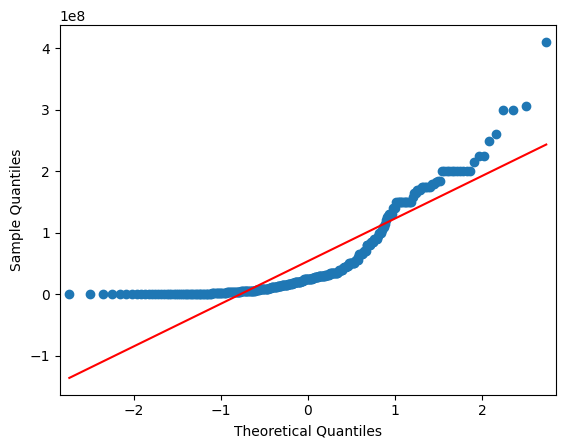

In [18]:
budget = df['Budget (float)'].dropna().values.astype(list)
sa.qqplot(data=budget,line='s')
pylab.show()

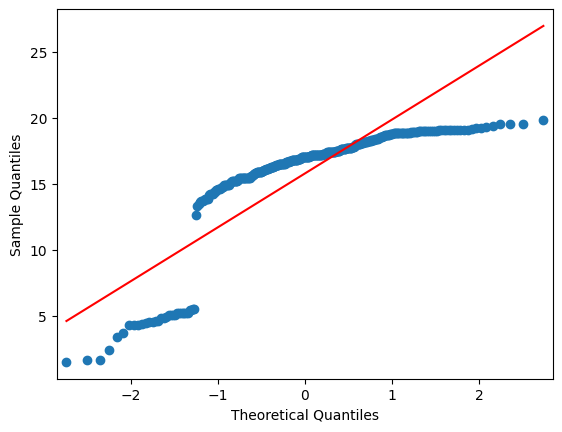

With 95% Confidence we can say that mean Budget of movies lies between $4550451.2 and $11150691.23


In [19]:
# after log transformation
budget_log = np.log(df['Budget (float)'].dropna()).values.astype(list)
sa.qqplot(data=budget_log,line='s')
pylab.show()
lb,ub = sm.DescrStatsW(data=budget_log).tconfint_mean() 
lb = math.exp(lb) 
ub = math.exp(ub)
print("With 95% Confidence we can say that mean Budget of movies lies between ${} and ${}".format(round(lb,2),round(ub,2)))

### Box Office Modelling

In [20]:
df['Release date (datetime)'] = pd.to_datetime(df['Release date (datetime)'])

In [21]:
df['Release Year'] = df['Release date (datetime)'].dt.year.astype('Int64')

In [22]:
df_new = df.drop(['Unnamed: 0', 'Directed by', 'Produced by', 'Starring', 'Title', 'Running time','Country', 'Language','Distributed by','Music by','Budget','Box office', 'Release date', 'Release date (datetime)'], axis=1).reindex()

In [23]:
df_new = df_new.dropna()

In [24]:
X = df_new.drop(['Box Office (float)'], axis=1).reindex()

In [25]:
y = df_new['Box Office (float)']

In [26]:
X.head()

,Running time(int),Budget (float),imdb,Metascore,Rotten_Tomato,Release Year
1,88.0,2600000.0,7.5,99.0,100.0,1940
2,126.0,2280000.0,7.7,96.0,95.0,1940
4,64.0,950000.0,7.2,96.0,98.0,1941
5,70.0,858000.0,7.3,91.0,91.0,1942
9,75.0,1350000.0,6.2,60.0,58.0,1946


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear Regression

In [112]:
lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train),
lr.score(X_test, y_test)))

lr.coef_: [ 2.44612471e+06  9.45571128e-01  1.44006817e+08  1.22821861e+07
 -8.54710965e+06  4.17061344e+06]
lr.intercept_: -9538253009.769835
lr train score 0.478, lr test score: 0.370


### Log Linear Regression

In [113]:
lr = LinearRegression().fit(X_train,y_train.apply(np.log))
y_train_pred = np.exp(lr.predict(X_train))
y_test_pred = np.exp(lr.predict(X_test))

#print score
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print('lr train score %.3f, lr test score: %.3f' % (
lr.score(X_train,y_train.apply(np.log)),
lr.score(X_test, y_test.apply(np.log))))

lr.coef_: [-1.46104792e-02  6.87446713e-09  6.01764739e-01  5.22535667e-02
 -4.11881530e-02  3.49747025e-02]
lr.intercept_: -54.91265285201348
lr train score 0.328, lr test score: 0.130


### Support Vector Regression

In [114]:
#svr = SVR(kernel='linear', C = 1, cache_size=7000)

#test train split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#standard scaler (fit transform on train, fit only on test)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train.astype(np.float))
# X_test= sc.transform(X_test.astype(np.float))

#fit model
#svr = svr.fit(X_train,y_train.values.ravel())
#y_train_pred = svr.predict(X_train)
#y_test_pred = svr.predict(X_test)

#print score
#print('svr train score %.3f, svr test score: %.3f' % (
#svr.score(X_train,y_train),
#svr.score(X_test, y_test)))

### Decision Tree Regresson

In [126]:
dt = DecisionTreeRegressor(random_state=0)

#fit model
dt = dt.fit(X_train,y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

#print score
print('Decision tree train score %.3f, Decision tree test score: %.3f' % (
dt.score(X_train,y_train),
dt.score(X_test, y_test)))

Decision tree train score 1.000, Decision tree test score: 0.335


Since train score is 1.0, this indicates overfitting.

### Random Forest Regressor

The forest consists of 100 decision trees with quality of splits measured by mean squared error.

In [116]:
forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'squared_error',
                              random_state = 1,
                              n_jobs = -1)

#fit model
forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('Forest train score %.3f, Forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

Forest train score 0.949, Forest test score: 0.508


### Random Forest Parameter Grid

#### Parameter Grid

In [117]:
param_grid_rf = dict(n_estimators=[20],
                    max_depth=np.arange(1,13,2),
                    min_samples_split=[2],
                    min_samples_leaf= (1,15,2,int),
                    bootstrap=[True,False],
                    oob_score=[False])

In [118]:
forest = GridSearchCV(RandomForestRegressor(random_state=42), 
                      param_grid=param_grid_rf, 
                      verbose=3)

In [119]:
#fit model
forest.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.185 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.359 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.319 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.415 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.278 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.142 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, m

[CV 1/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.299 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.683 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.610 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.828 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.572 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=7, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.241 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=7, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_

[CV 1/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.144 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.311 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.267 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.365 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.201 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.144 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimator

[CV 1/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=-0.061 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.642 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.396 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.585 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=20, oob_score=False;, score=-0.005 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=7, min_samples_leaf=15, min_samples_split=2, n_estimators=20, oob_score=False;, score=0.413 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=7, min_samples_leaf=15, min_samples_split=2, n_estimators

C:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\marco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py"

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11]),
                         'min_samples_leaf': (1, 15, 2, <class 'int'>),
                         'min_samples_split': [2], 'n_estimators': [20],
                         'oob_score': [False]},
             verbose=3)

In [120]:
def print_best_params(model):
    param = model.best_estimator_.get_params()
    model_str = str(model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param:
        print("{}: {}".format(k, param[k]))

In [121]:
#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

print_best_params(forest)



forest train score 0.944, forest test score: 0.457

*** RandomForestRegressor Best Parameters ***
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: 11
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 20
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [122]:
predict_df = pd.DataFrame(forest.predict(X_test), columns=['Predicted'])
actual_df = pd.DataFrame(np.asarray(y_test), columns=['Actual'])
total = pd.concat([predict_df, actual_df], axis=1)
total

,Predicted,Actual
0,6.596739e+07,5.000000e+07
1,5.548271e+07,2.560000e+06
2,5.484157e+07,1.179000e+08
3,4.082500e+08,1.697000e+08
4,5.224150e+08,1.025000e+09
...,...,...
77,1.850642e+08,1.368000e+08
78,7.300301e+07,6.500000e+07
79,5.401301e+07,4.007100e+07
80,8.962706e+07,1.493000e+08


In [123]:
# To format the y-axis labels
def millions_formatter(x, pos):
    """Divides the value by 1 million and formats it as a string"""
    return f'{x / 1e6:g}'

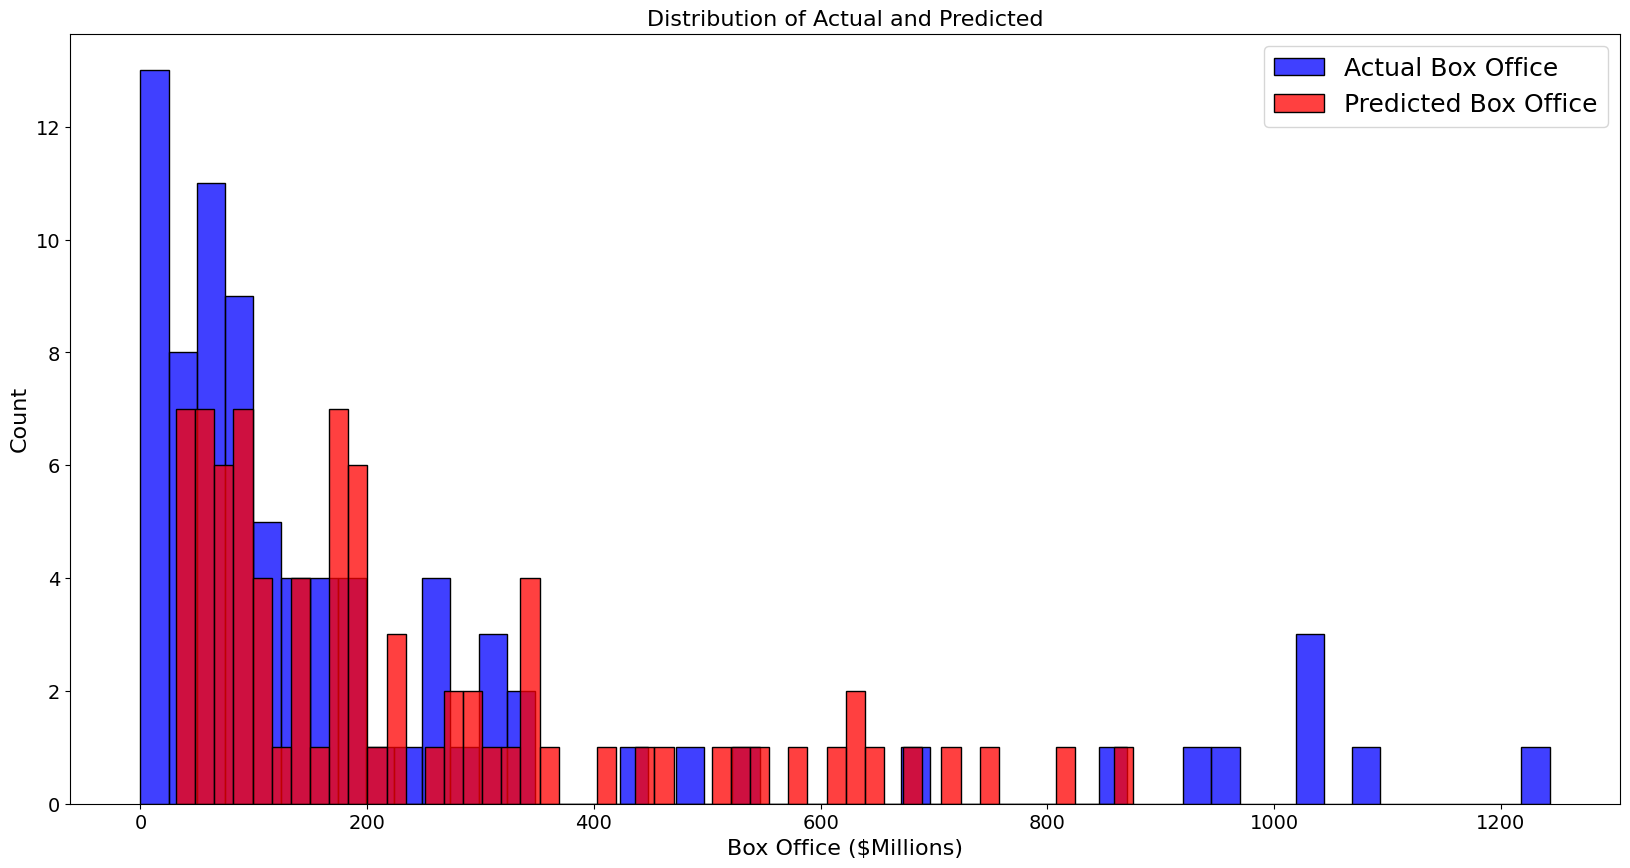

In [124]:
# Actual and Predictions distribution 
fig, ax = plt.subplots(figsize = (20, 10))
sns.histplot(total['Actual'], color='blue', kde=False, bins=50, label='Actual Box Office')
sns.histplot(total['Predicted'], color='red', kde=False, bins=50, label='Predicted Box Office')


# Set the y-axis formatter
ax.xaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

ax.set_title("Distribution of Actual and Predicted", fontsize=16)
plt.xlabel('Box Office ($Millions)', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=14)
plt.legend(loc='upper right');
ax.legend(fontsize=18)

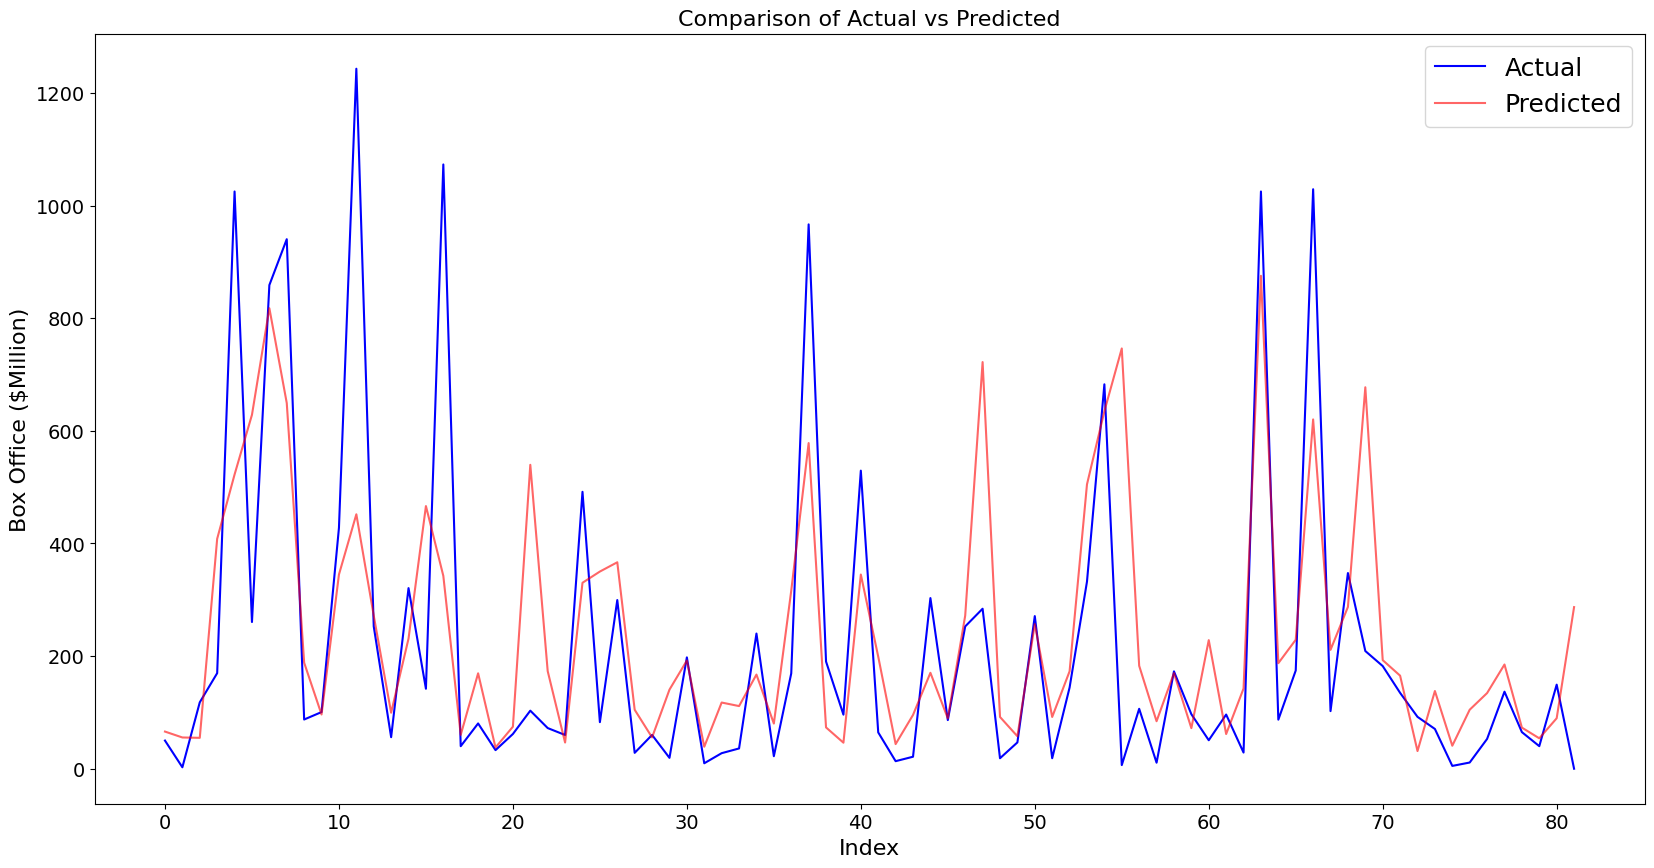

In [125]:
# Visualize actual and predicted values on test data

plt.figure(figsize=(20,10))

#ax.yaxis.get_major_formatter().set_scientific(False)
sns.lineplot(x = total.index.values, y = total.Actual, color = 'blue', label="Actual")
sns.lineplot(x = total.index.values, y = total.Predicted, color = 'red', alpha = 0.6, label="Predicted")

ax = plt.gca()

# Set the y-axis formatter
ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

ax.set_title("Comparison of Actual vs Predicted", fontsize=16)
ax.set_xlabel("Index", fontsize=16)
plt.xticks(fontsize=14)
ax.set_ylabel("Box Office ($Million)", fontsize=16)
plt.yticks(fontsize=14)
ax.legend(fontsize=18)